In [1]:
import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile
#import soundfile as sf
import os
import glob
import numpy as np
from PIL import Image, ImageEnhance
from scipy.fftpack import fft
from scipy.misc import imresize
from IPython.core.display import HTML
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
import operator
import seaborn as sns
import cv2
import random
import tensorflow_hub as hub
import librosa
from tensorflow.python.data import Dataset
import librosa.display
%matplotlib inline
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
audio_path = './data/no_vocal/'
pic_path = "./data/no_vocal2/"
data_labels = os.listdir(audio_path)
data_labels.pop(2)
data_labels

['no', 'stop']

In [3]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False,
                                    nfft=1024)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

In [4]:
def wav2img(wav_path, targetdir='', figsize=(4,4)):
    samplerate, test_sound  = wavfile.read(wav_path)
    spectrogram = librosa.feature.melspectrogram(test_sound, sr=samplerate, n_mels=128, fmax=512)

    
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = targetdir +'/'+ output_file
    #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    spectrogram = librosa.feature.melspectrogram(test_sound, sr=samplerate, n_mels=128, fmax=512)

    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    spectrogram = imresize(spectrogram, (96,96))
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(spectrogram, sr=samplerate, x_axis='time', y_axis='mel')
    plt.tight_layout()
    plt.imsave('%s.jpg' % output_file, spectrogram)
    plt.close()
    return spectrogram

In [5]:
# sample = []
# for label in labels:
#     for channel in range(1,4):
#         ch_sample = os.listdir(audio_path + label + "/" + "ch" + str(channel))[:1]
#         for x in ch_sample:
#             sample.append(audio_path + label + "/" + "ch" + str(channel) + "/" + x)

# sample
# len(sample)

In [6]:
# sample_audio = sample
# for i, filepath in enumerate(sample_audio[:3]):
#     # Make subplots
#     plt.subplot(1,3,i+1)
#     # pull the labels
#     plt.title(i)

#     # create spectogram
#     samplerate, test_sound  = wavfile.read(filepath)
#     _, spectrogram = log_specgram(test_sound, samplerate)

#     plt.imshow(spectrogram.T, aspect="auto", origin='lower')
#     plt.axis('off')


In [7]:
# for i, filepath in enumerate(sample_audio[3:6]):
#     # Make subplots
#     plt.subplot(1,3,i+1)
#     # pull the labels
#     plt.title(i)

#     # create spectogram
#     samplerate, test_sound  = wavfile.read(filepath)
#     _, spectrogram = log_specgram(test_sound, samplerate)

#     plt.imshow(spectrogram.T, aspect="auto", origin='lower')
#     plt.axis('off')

In [8]:

# for i, filepath in enumerate(sample_audio[6:9]):
#     # Make subplots
#     plt.subplot(1,3,i+1)
#     # pull the labels
#     plt.title(i)

#     # create spectogram
#     samplerate, test_sound  = wavfile.read(filepath)
#     _, spectrogram = log_specgram(test_sound, samplerate)

#     plt.imshow(spectrogram.T, aspect="auto", origin='lower')
#     plt.axis('off')

In [9]:
labels_to_keep = ['yes', 'no', 'up', 'down', 'left',
                  'right', 'on', 'off', 'stop', 'go']

test_labels = ['yes', 'no', 'up', 'down', 'left',
                  'right', 'on', 'off', 'stop', 'go', 'silence']

label_dict = {'yes':0, 'no':1,'stop':2}

reverse_dict = {v: k for k, v in label_dict.items()}

In [10]:
# for i, x in enumerate(labels):
#         all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
#         for file in all_files[:]:
#             wav2img(audio_path + x + '/' + file, './data/img/' + x)

In [11]:
# make the pict data directory with label folders

# data = "./data/"
# labels = ['no','stop','yes']
# for f in labels:
#     if not os.path.exists("./data/no_vocal2" + f): 
#         os.mkdir("./data/no_vocal2/" + f)
#     for i in range(1,9):
#         if not os.path.exists("./data/no_voal2/" + f + "/" + "ch" + str(i)):
#             os.mkdir("./data/no_vocal2/" + f + "/" + "ch" + str(i))

In [ ]:
#code for turning wav files into jpg.

for i, x in enumerate(['no','yes','stop']):
    print(i, ':', x)
    # get all the wave files
    for i in range(6,7):
        all_files = [y for y in os.listdir(audio_path + x + "/" + "ch" + str(i)) if '.wav' in y]
        for file in all_files:
            if not any(x in file for x in ['204', '205', '197']):
                wav2img(audio_path + x + "/" + "ch" + str(i) + '/' + file, pic_path + x + "/" + "ch" + str(i))
                print("%s %s %s" %(x, str(i), file))

0 : no


/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


no 6 00156_jul23.wav
no 6 00340_jul24.wav
no 6 00427_jul24.wav
no 6 00555_jul20.wav
no 6 00146_jul24.wav
no 6 00308_jul23.wav
no 6 00169_jul23.wav
no 6 00020_jul23.wav
no 6 00093_jul09.wav
no 6 00167_jul09.wav
no 6 00277_jul24.wav
no 6 00613_jul24.wav
no 6 00045_jul23.wav
no 6 00102_jul24.wav
no 6 00566_jul20.wav
no 6 00202_jul20.wav
no 6 00238_jul23.wav
no 6 00227_jul24.wav
no 6 00097_jul20.wav
no 6 00480_jul23.wav
no 6 00393_jul23.wav
no 6 00527_jul20.wav
no 6 00302_jul20.wav
no 6 00140_jul23.wav
no 6 00468_jul20.wav
no 6 00200_jul09.wav
no 6 00223_jul23.wav
no 6 00039_jul24.wav
no 6 00076_jul09.wav
no 6 00107_jul20.wav
no 6 00503_jul23.wav
no 6 00208_jul24.wav
no 6 00038_jul20.wav
no 6 00490_jul20.wav
no 6 00040_jul09.wav
no 6 00456_jul23.wav
no 6 00156_jul20.wav
no 6 00387_jul23.wav
no 6 00082_jul20.wav
no 6 00540_jul20.wav
no 6 00153_jul23.wav
no 6 00381_jul23.wav
no 6 00337_jul20.wav
no 6 00082_jul09.wav
no 6 00364_jul24.wav
no 6 00167_jul20.wav
no 6 00342_jul20.wav
no 6 00271_ju

no 6 00375_jul20.wav
no 6 00047_jul24.wav
no 6 00135_jul09.wav
no 6 00181_jul23.wav
no 6 00127_jul23.wav
no 6 00270_jul24.wav
no 6 00541_jul24.wav
no 6 00209_jul23.wav
no 6 00021_jul20.wav
no 6 00236_jul24.wav
no 6 00125_jul09.wav
no 6 00398_jul23.wav
no 6 00174_jul09.wav
no 6 00243_jul20.wav
no 6 00280_jul20.wav
no 6 00391_jul24.wav
no 6 00489_jul24.wav
no 6 00130_jul20.wav
no 6 00037_jul24.wav
no 6 00111_jul23.wav
no 6 00225_jul24.wav
no 6 00157_jul24.wav
no 6 00148_jul09.wav
no 6 00004_jul20.wav
no 6 00363_jul20.wav
no 6 00410_jul24.wav
no 6 00058_jul24.wav
no 6 00157_jul20.wav
no 6 00356_jul24.wav
no 6 00369_jul24.wav
no 6 00034_jul23.wav
no 6 00001_jul20.wav
no 6 00355_jul20.wav
no 6 00104_jul20.wav
no 6 00036_jul24.wav
no 6 00121_jul09.wav
no 6 00306_jul23.wav
no 6 00454_jul20.wav
no 6 00278_jul23.wav
no 6 00240_jul20.wav
no 6 00448_jul24.wav
no 6 00511_jul24.wav
no 6 00024_jul09.wav
no 6 00274_jul24.wav
no 6 00291_jul23.wav
no 6 00009_jul09.wav
no 6 00118_jul20.wav
no 6 00181_ju

In [ ]:
# for i, x in enumerate(subFolderList):
#     if x in labels_to_keep:
#         print(i, ':', x)
#         # get all the wave files
#         all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
#         for file in all_files[101:120]:
#             wav2img(audio_path + x + '/' + file, test_pict_Path + x)
#     else:
#         all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
#         for file in all_files[16:20]:
#             wav2img(audio_path + x + '/' + file, "./input/picts/test/unknown")

In [ ]:
# test = tf.image.decode_png("./input/picts/train/down/00b01445_nohash_1.png",3)
# sess = tf.Session()
# print(sess.run(test))

In [12]:
train_images = []
train_labels = []
for i, x in enumerate(['yes','no', 'stop']): #choose the classes to train
    all_files = [y for y in os.listdir(pic_path + x + "/ch2") if '.jpg' in y]
    for file in all_files:
        train_images.append(cv2.imread(pic_path + x + '/ch2/' + file))
        train_labels.append(label_dict[x])

train_images = np.array(train_images, dtype="float32")
train_images /= 255
train_labels = np.array(train_labels)
print(train_images.shape)
print(type(train_labels))

(5825, 96, 96, 3)
<class 'numpy.ndarray'>


In [13]:
print(train_labels.shape)

(5825,)


In [14]:
# code to shuffe feature and label arrays.
#train_labels.reshape((1, -1))
train_labels = np.array(train_labels, dtype="int32")
randomize = np.arange(len(train_labels))
np.random.shuffle(randomize)
print(train_labels)
labels = train_labels[randomize]
features = train_images[randomize]
print(labels)

[0 0 0 ..., 2 2 2]
[2 1 2 ..., 1 2 1]


In [15]:
print(len(labels))

5825


In [16]:
# code to split training and validation data
x = len(labels)
x *= 0.8
x = int(x)
training_examples = features[:x]
validation_examples = features[x:]

training_targets = labels[:x]
validation_targets = labels[x:]
print(training_targets)
print(validation_targets)
print(training_targets.shape)
print(validation_targets.shape)
print(training_examples)

[2 1 2 ..., 0 1 0]
[0 2 2 ..., 1 2 1]
(4660,)
(1165,)
[[[[ 0.43529412  0.43529412  0.43529412]
   [ 0.43921569  0.43921569  0.43921569]
   [ 0.46666667  0.46666667  0.46666667]
   ..., 
   [ 0.42745098  0.42745098  0.42745098]
   [ 0.39215687  0.39215687  0.39215687]
   [ 0.3882353   0.3882353   0.3882353 ]]

  [[ 0.36470589  0.36470589  0.36470589]
   [ 0.36862746  0.36862746  0.36862746]
   [ 0.39607844  0.39607844  0.39607844]
   ..., 
   [ 0.36470589  0.36470589  0.36470589]
   [ 0.33725491  0.33725491  0.33725491]
   [ 0.33333334  0.33333334  0.33333334]]

  [[ 0.34117648  0.34117648  0.34117648]
   [ 0.34509805  0.34509805  0.34509805]
   [ 0.36862746  0.36862746  0.36862746]
   ..., 
   [ 0.34117648  0.34117648  0.34117648]
   [ 0.30980393  0.30980393  0.30980393]
   [ 0.30588236  0.30588236  0.30588236]]

  ..., 
  [[ 0.83529413  0.83529413  0.83529413]
   [ 0.8392157   0.8392157   0.8392157 ]
   [ 0.85490197  0.85490197  0.85490197]
   ..., 
   [ 0.94901961  0.94901961  0.9490

In [17]:
def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  input_layer = tf.reshape(features, [-1, 96, 96, 3])

  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2) 

  # Convolutional Layer #2 and Pooling Layer #2
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Dense Layer
  pool2_flat = tf.reshape(pool2, [-1, 36864])
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits Layer
  logits = tf.layers.dense(inputs=dropout, units=3)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
    
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [18]:
def construct_feature_columns():
  # There are 9216 pixels in each image.
  return set([tf.feature_column.numeric_column('pixels', shape=9216)])

In [19]:
def create_predict_input_fn(features, labels, batch_size):#, num_epochs=None, shuffle=True):
#     print("predict input fn")
#     print(type(features))
#     print(type(labels))
#     print(type(batch_size))
    predict_input_fn = tf.estimator.inputs.numpy_input_fn(
        x=features,
        y=labels,
        num_epochs=1,
        shuffle=False)
    return predict_input_fn

def create_training_input_fn(features, labels, batch_size):#, num_epochs=None, shuffle=True):
#     print("training input fn")
#     print(type(features))
#     print(type(labels))
#     print(type(batch_size))
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x=features,
        y=labels,
        batch_size=batch_size,
        num_epochs=None,
        shuffle=True)
    return train_input_fn

In [20]:
def train_hub_classification_model(
    learning_rate,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):

    periods = 10
    steps_per_period = steps / periods 
#     tensors_to_log = {"probabilities": "softmax_tensor"}
# #     logging_hook = tf.train.LoggingTensorHook(
# #         tensors=tensors_to_log, every_n_iter=10)
    
    predict_training_input_fn = create_predict_input_fn(training_examples, training_targets, batch_size)
    predict_validation_input_fn = create_predict_input_fn(validation_examples, validation_targets, batch_size)
  
    training_input_fn = create_training_input_fn(training_examples, training_targets, batch_size)
    predict_training_input_fn = create_predict_input_fn(training_examples, training_targets, batch_size)
    
    predict_validation_input_fn = create_predict_input_fn(validation_examples, validation_targets, batch_size)
    training_input_fn = create_training_input_fn(training_examples, training_targets, batch_size)
  
    feature_columns = [tf.feature_column.numeric_column('pixels', shape=9216)]

    my_optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
###############################################################
    classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn,
    model_dir="./mode_CNN_4"
    )
##############################################################################
    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("LogLoss error (on validation data):")
    training_errors = []
    validation_errors = []
    for period in range (0, periods):
        classifier.train(
            input_fn=training_input_fn,
            steps=steps_per_period,
        )
        training_predictions = list(classifier.predict(input_fn=predict_training_input_fn))
        training_probabilities = np.array([item['probabilities'] for item in training_predictions])
        training_pred_class_id = np.array([item['classes'] for item in training_predictions])
        training_pred_one_hot = tf.keras.utils.to_categorical(training_pred_class_id,3) #change class number

        validation_predictions = list(classifier.predict(input_fn=predict_validation_input_fn))
        validation_probabilities = np.array([item['probabilities'] for item in validation_predictions])    
        validation_pred_class_id = np.array([item['classes'] for item in validation_predictions])
        validation_pred_one_hot = tf.keras.utils.to_categorical(validation_pred_class_id,3) #change class number

        # Compute training and validation errors.
        training_log_loss = metrics.log_loss(training_targets, training_pred_one_hot)
        validation_log_loss = metrics.log_loss(validation_targets, validation_pred_one_hot)
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, validation_log_loss))
        # Add the loss metrics from this period to our list.
        training_errors.append(training_log_loss)
        validation_errors.append(validation_log_loss)
        
    print("Model training finished.")
    # Remove event files to save disk space.
    _ = map(os.remove, glob.glob(os.path.join(classifier.model_dir, 'events.out.tfevents*')))

    # Calculate final predictions (not probabilities, as above).
    final_predictions = classifier.predict(input_fn=predict_validation_input_fn)
    final_predictions = np.array([item['classes'] for item in final_predictions])


    accuracy = metrics.accuracy_score(validation_targets, final_predictions)
    print("Final accuracy (on validation data): %0.2f" % accuracy)

    # Output a graph of loss metrics over periods.
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.plot(training_errors, label="training")
    plt.plot(validation_errors, label="validation")
    plt.legend()
    plt.show()

    # Output a plot of the confusion matrix.
    cm = metrics.confusion_matrix(validation_targets, final_predictions)
    # Normalize the confusion matrix by row (i.e by the number of samples
    # in each class).
    cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    ax = sns.heatmap(cm_normalized, cmap="bone_r")
    ax.set_aspect(1)
    plt.title("Confusion matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

    return classifier

In [21]:
#len(set(training_targets))
#validation_targets
print(validation_examples.shape)
print(len(validation_examples))

(1165, 96, 96, 3)
1165


In [22]:
print(len(set(validation_targets)))
print(len(set(training_targets)))

3
3


Training model...
LogLoss error (on validation data):
  period 00 : 22.89
  period 01 : 22.86
  period 02 : 22.98
  period 03 : 22.89
  period 04 : 22.47
  period 05 : 22.89
  period 06 : 22.62
  period 07 : 22.89
  period 08 : 22.38
  period 09 : 22.86
Model training finished.
Final accuracy (on validation data): 0.34


/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


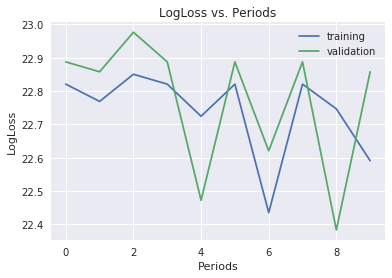

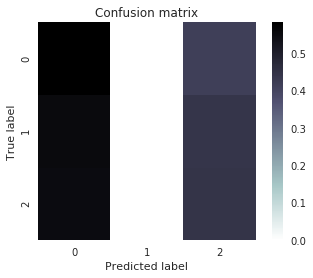

In [23]:
classifier = train_hub_classification_model(
    learning_rate=0.01,
    steps=1000,
    batch_size=100,
    hidden_units=[200, 200],
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

In [ ]:
# !sudo shutdown -h now CH2

In [ ]:
classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn,
    model_dir="./mode_CNN_2",
    )

In [ ]:
def my_test_input_fn(features, batch_size=1, num_epochs=None):
    raw_features = features
    ds = Dataset.from_tensor_slices((raw_features))
    ds = ds.batch(batch_size).repeat(num_epochs)
    features = ds.make_one_shot_iterator().get_next()
    return features

predict_test_input_fn = lambda: my_test_input_fn(
    test_images,
    num_epochs=1,)

In [ ]:
test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.jpg' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[:50000]:
    test_images.append(cv2.imread(test_pict_path + file))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('sub_voice_' + 'x' + '.csv', index=False)


In [ ]:
# kernel keeps dying when running all test files, so I split it into thirds and concat the datasets afterward.
test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.jpg' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[50000:100000]:
    test_images.append(cv2.imread(test_pict_path + file))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('sub_voice_' + 'y' + '.csv', index=False)


In [ ]:
test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.jpg' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[100000:]:
    test_images.append(cv2.imread(test_pict_path + file))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('sub_voice_' + 'z' + '.csv', index=False)


In [ ]:
d0 = pd.read_csv("./sub_voice_" + 'x' + ".csv",sep=",")
d1 = pd.read_csv("./sub_voice_" + 'y' + ".csv",sep=",")
d2 = pd.read_csv("./sub_voice_" + 'z' + ".csv",sep=",")

df = [d0,d1,d2]
dx = pd.concat(df)

dx = dx.replace({"label": reverse_dict})

dx.to_csv('sub_CNN2.csv', index=False)
dx